In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import cv2
from matplotlib import pyplot as plt

def to_data(img):
  for row in img:
    for pixel in row:
      yield tuple(pixel)

def mean_shift(data, bandwidth=15):
  ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  ms.fit(data)
  labels = ms.labels_
  cluster_centers = ms.cluster_centers_
  return (labels, cluster_centers)

def make_shifted_img(shape, labels, centers):
  img = list()
  color = (centers[la] for la in labels)
  for i in range(shape[0]):
    img.append(list())
    for j in range(shape[1]):
      img[i].append([int(c) for c in next(color)])

  return np.array(img, dtype='uint8')

ValueError: zero-size array to reduction operation minimum which has no identity

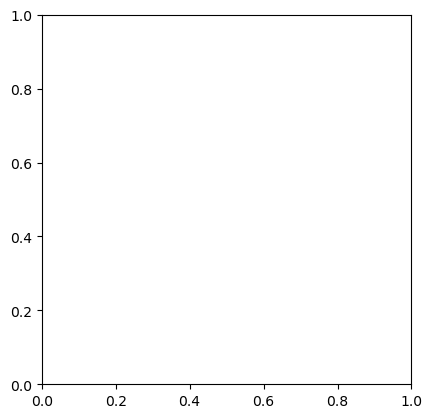

In [3]:
img = cv2.imread('c://temp//melanoma.png', cv2.IMREAD_UNCHANGED)
img = img[300:1000, 100:, ::-1]

plt.imshow(img)
plt.show()

img_data = tuple(to_data(img))

print('formatou os dados')

img_lables, img_centers = mean_shift(img_data, bandwidth=17)

print('obteve as labels e os centros')

new_img = make_shifted_img(img.shape, img_lables, img_centers)

print('obteve nova imagem')

plt.imshow(new_img)
plt.show()

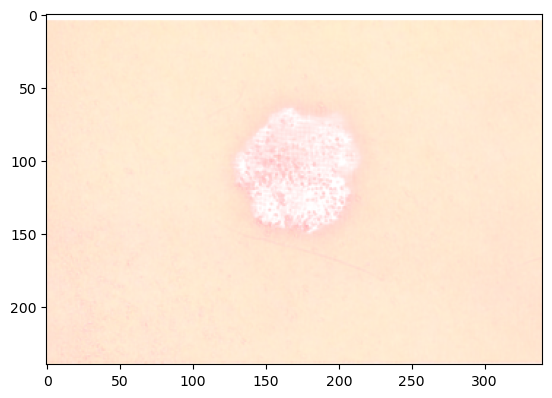

formatou os dados
obteve as labels e os centros
obteve nova imagem


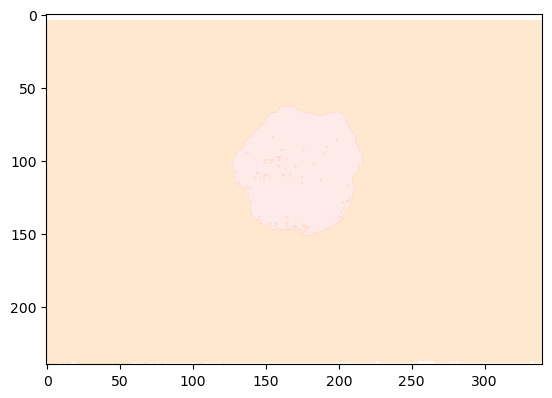

In [8]:
img = cv2.imread('c://temp//melanoma.png', cv2.IMREAD_UNCHANGED)
img = img[... , ::-1]

plt.imshow(img)
plt.show()

img_data = tuple(to_data(img))

print('formatou os dados')

img_lables, img_centers = mean_shift(img_data, bandwidth=70)

print('obteve as labels e os centros')

new_img = make_shifted_img(img.shape, img_lables, img_centers)

print('obteve nova imagem')

plt.imshow(new_img)
plt.show()
